# Лабораторная работа №7
## Анализ помех для разных типов антенн
### Логинов Сергей
### НФИмд-01-22

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

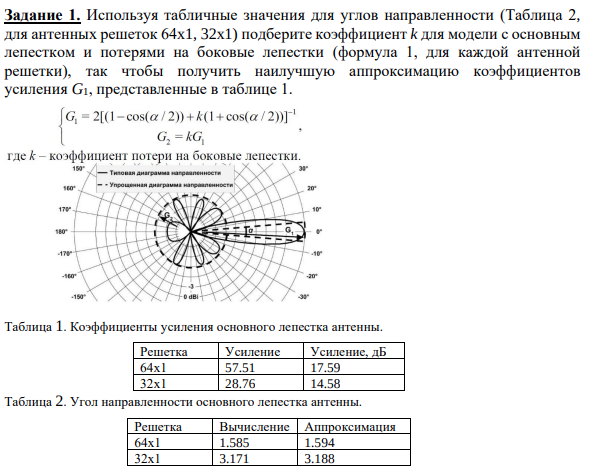

Загрузим созданные таблицы

In [9]:
power = pd.read_csv('pow.csv', sep=';')
power

,grid,pow,pow_db
0,64x1,57.51,17.59
1,32x1,28.76,14.58


In [11]:
angle = pd.read_csv('angle.csv', sep=';')
angle

,grid,comp,appr
0,64x1,1.585,1.594
1,32x1,3.171,3.188


Функция нахожденя k - выражаем из первого уравнения системы

In [24]:
def k(g1, a):
    return ((2 / g1) - (1 - np.cos(a / 2))) / (1 + np.cos(a / 2)) 

Функция для нахождения G2 - второе уравнение системы

In [25]:
def g2(g1, k):
    return g1*k

Задаем начальные значения усилений

In [58]:
g1_64 = power.iloc[0, 1]
g1_64

57.51

In [59]:
g1_32 = power.iloc[1, 1]
g1_32

28.76

Задаем углы в радианах

In [60]:
a64 = angle.iloc[0, 1]*(np.pi/180)
a64

0.027663468644110123

In [37]:
a32 = angle.iloc[1, 1]*(np.pi/180)
a32

0.055344390580740185

К для решетки 64х1

In [61]:
k64 = k(g1_64, a64)
k64

0.017341281249737394

G2 для решетки 64х1

In [62]:
g2_64 = g2(g1_64, k64)
g2_64

0.9972970846723975

In [40]:
print('64x1 grid')
print('k =', k64, 'G1 =', g1_64, 'G2 =', g2_64)

64x1 grid
k = 0.017341281249737394 G1 = 57.51 G2 = 0.9972970846723975


K для решетки 32х1

In [42]:
k32 = k(g1_32, a32)
k32

0.034585709804094526

G2 для решетки 32х1

In [63]:
g2_32 = g2(g1_32, k32)
g2_32

0.9946850139657586

In [44]:
print('32x1 grid')
print('k =', k32, 'G1 =', g1_32, 'G2 =', g2_32)

32x1 grid
k = 0.034585709804094526 G1 = 28.76 G2 = 0.9946850139657586


Задание 2. 

Рассчитайте вероятность блокировки в двухмерной и трехмерной модели для высоты базовой станции 10 м, высоты приемника 1.4 м, высоты человека 1.7 м. В случае двухмерного сценария высоту базовой станции взять равной высоте приемника. Построить график зависимости вероятностей от интенсивности блокирующих объектов, оценить и сравнить полученные результаты.

Задаем начальные условия

In [71]:
h1 = 10 
h2 = 1.4 
h3 = 1.7 

Задаем интенсивность блокаторов

In [72]:
block = np.linspace(0.1, 3, 100)

Радиус и расстояние до BS

In [73]:
r = 0.5
d = 3

По формуле считаем вероятность для двухмерной модели

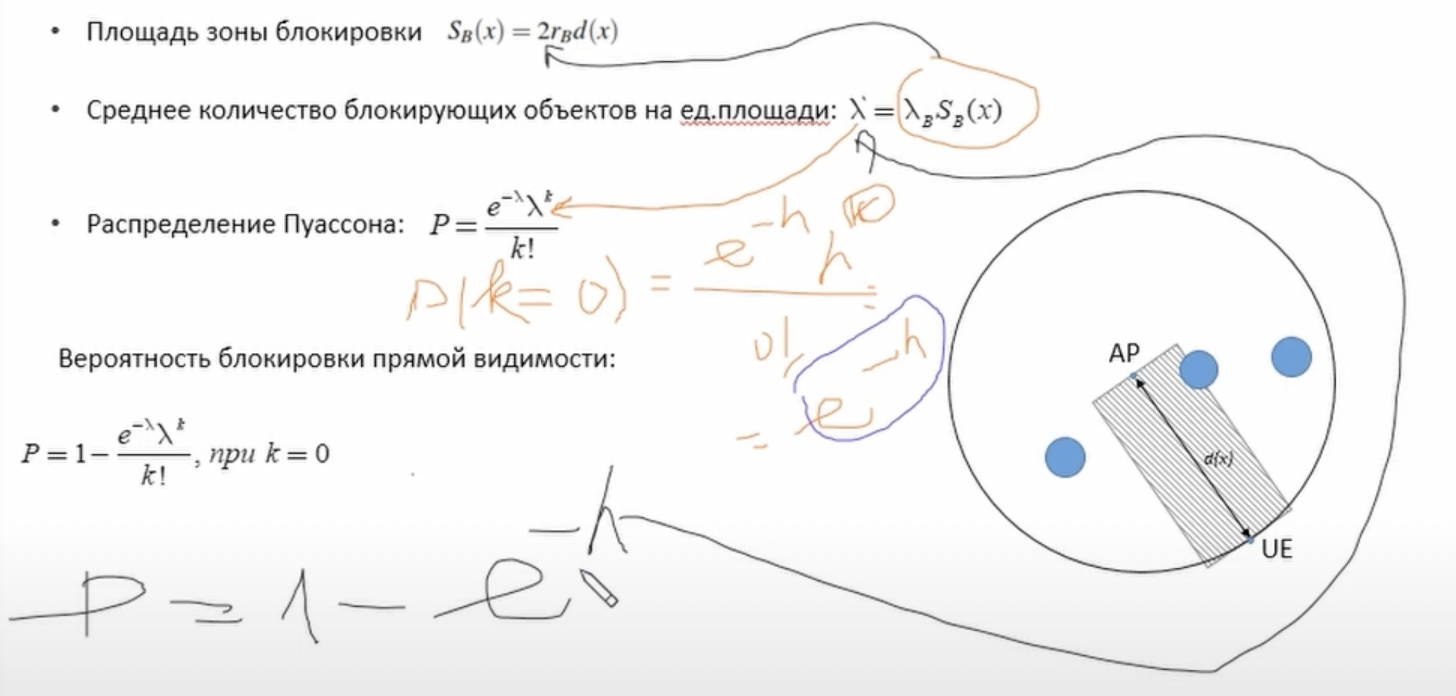

In [74]:
def case_2d(block, r, d):
    return 1 - np.exp(-block*2*r*d)

По формуле считаем вероятность для трехмерной модели

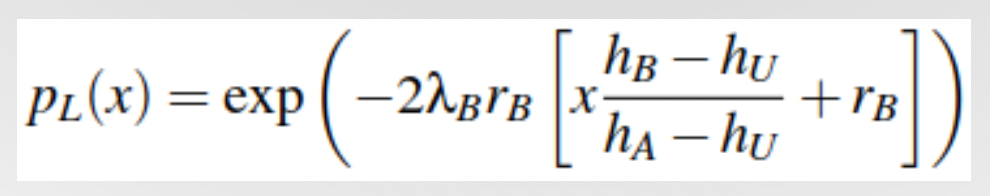

In [75]:
def case_3d(block, r, d, h1, h2, h3):
    return 1 - np.exp(-block*2*r*((d*((h3-h2)/(h1-h2)))+r))

Создаем списки вероятностей для каждого значения интенсивности

In [76]:
p_2d = []
for i in block:
    p_2d.append(case_2d(i, r=r, d=d))

In [77]:
p_3d = []
for i in block:
    p_3d.append(case_3d(i, r=r, d=d, h1=h1, h2=h2, h3=h3))

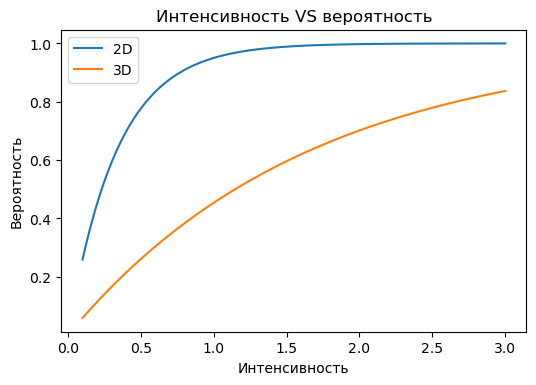

In [81]:
plt.figure(dpi=100)
plt.plot(block, p_2d, label='2D')
plt.plot(block, p_3d, label='3D')
plt.xlabel('Интенсивность')
plt.ylabel('Вероятность')
plt.title('Интенсивность VS вероятность')
plt.legend()
plt.show()